## Предобработка:


In [1]:
import pandas as pd

#### Загрузим данные:

In [124]:
#На основе переменных о количестве (кликов в адрес, во вход, в карточку)
#, а также о количестве пользователей и медианном расстоянии от пользователя до объекта

data = pd.read_csv('Data_Projects.csv', ';', decimal=',').drop(['FirmsCount', 'GeoPart', 'MobilePart', 'IsGeo'], axis='columns')


In [125]:
data

,AddressCount,CallsCount,ClicksCount,UsersCount,Distance
0,156,20,1903,1125,749.966084
1,17,37,258,157,2289.032424
2,78,56,1956,1195,1423.376512
3,14,70,378,206,3396.566089
4,111,90,4089,2934,1576.514154
...,...,...,...,...,...
74,2535,12436,44597,11172,1908.108110
75,1103,12805,33388,13911,2642.200165
76,3132,20609,75303,23982,2278.162917
77,5740,47912,167155,61127,989.412139


#### Посмотрим распределения признаков:

In [126]:
import matplotlib.pyplot as plt
import numpy as np

(array([15., 12., 11., 10., 11.,  6.,  7.,  1.,  3.,  3.]),
 array([ 714.7872362 , 1272.52924372, 1830.27125124, 2388.01325876,
        2945.75526628, 3503.49727379, 4061.23928131, 4618.98128883,
        5176.72329635, 5734.46530387, 6292.20731139]),
 <a list of 10 Patch objects>)

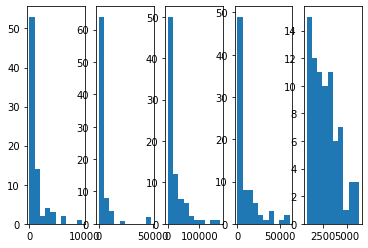

In [127]:
_, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols = 5)
ax1.hist(data['AddressCount'])
ax2.hist(data['CallsCount'])
ax3.hist(data['ClicksCount'])
ax4.hist(data['UsersCount'])
ax5.hist(data['Distance'])

Данные походи на логнормальные, попробуем прологарифмировать:

(array([ 5., 15., 21., 10., 16., 12.]),
 array([ 5.05624581,  6.050323  ,  7.04440019,  8.03847738,  9.03255457,
        10.02663176, 11.02070895]),
 <a list of 6 Patch objects>)

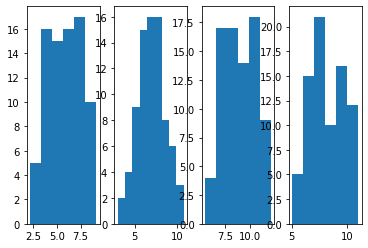

In [128]:
_, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4)
ax1.hist(np.log(data['AddressCount']), bins='fd')
ax2.hist(np.log(data['CallsCount']), bins='fd')
ax3.hist(np.log(data['ClicksCount']), bins='fd')
ax4.hist(np.log(data['UsersCount']), bins='fd')

Только 2 график похож на нормальные данные теперь, так что оставим как было.

{'whiskers': [<matplotlib.lines.Line2D at 0x1e420c8f348>,
 'caps': [<matplotlib.lines.Line2D at 0x1e420cb6d88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e420c55b88>],
 'medians': [<matplotlib.lines.Line2D at 0x1e420cb6fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e420c9e608>],
 'means': []}

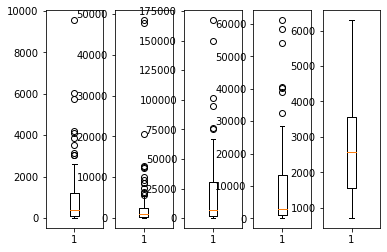

In [129]:
_, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols = 5)
ax1.boxplot(data['AddressCount'])
ax2.boxplot(data['CallsCount'])
ax3.boxplot(data['ClicksCount'])
ax4.boxplot(data['UsersCount'])
ax5.boxplot(data['Distance'])

Удалим 2 выброса из данных CallsCount. "Выбросы" остальных параметров могут быть и особенностями распределения.

In [130]:
data = data[(data['CallsCount'] < 30000) & (data['AddressCount'] < 8000)]

In [131]:
data.shape

(76, 5)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e420e507c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1e420eb0c48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e420e8c708>],
 'medians': [<matplotlib.lines.Line2D at 0x1e420eb3bc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e420eb3e48>],
 'means': []}

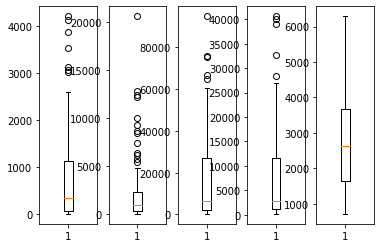

In [132]:
_, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols = 5)
ax1.boxplot(data['AddressCount'])
ax2.boxplot(data['CallsCount'])
ax3.boxplot(data['ClicksCount'])
ax4.boxplot(data['UsersCount'])
ax5.boxplot(data['Distance'])

(array([12., 12., 11., 10., 11.,  6.,  7.,  1.,  3.,  3.]),
 array([ 714.7872362 , 1272.52924372, 1830.27125124, 2388.01325876,
        2945.75526628, 3503.49727379, 4061.23928131, 4618.98128883,
        5176.72329635, 5734.46530387, 6292.20731139]),
 <a list of 10 Patch objects>)

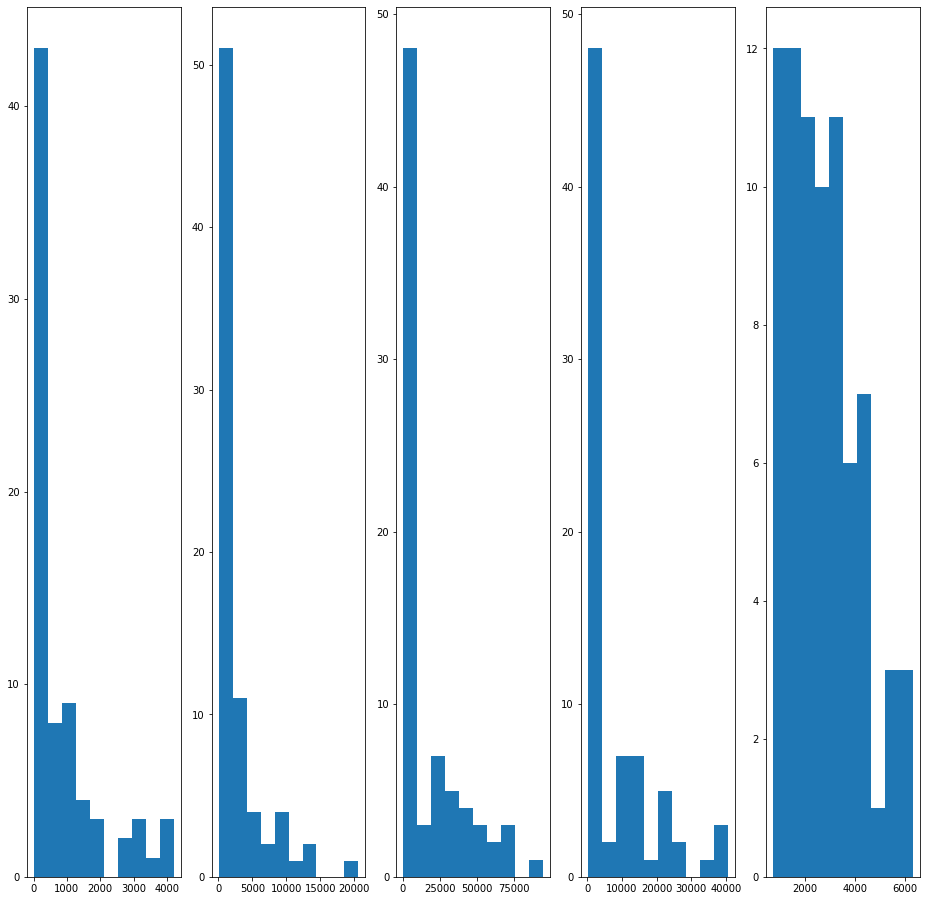

In [133]:
_, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols = 5, figsize=(16, 16))
#plt.figure(figsize=(8,8),facecolor='red',edgecolor='blue')
ax1.hist(data['AddressCount'])
ax2.hist(data['CallsCount'])
ax3.hist(data['ClicksCount'])
ax4.hist(data['UsersCount'])
ax5.hist(data['Distance'])

In [134]:
data.describe()

,AddressCount,CallsCount,ClicksCount,UsersCount,Distance
count,76.000000,76.000000,76.000000,76.000000,76.000000
mean,808.763158,2521.447368,17179.236842,7854.223684,2738.988374
std,1075.452920,3775.458974,22131.060449,10255.461594,1410.950716
min,9.000000,20.000000,258.000000,157.000000,714.787236
25%,77.750000,347.000000,1997.500000,1137.500000,1646.303993
50%,345.000000,913.500000,6363.500000,2858.000000,2639.042209
75%,1133.000000,2348.500000,27011.500000,11661.500000,3676.600326
max,4204.000000,20609.000000,94918.000000,40614.000000,6292.207311


## Приступим к кластеризации

In [135]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster

In [136]:
z = linkage(data, 'median')


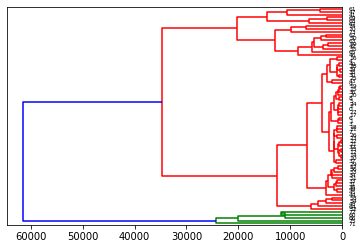

In [137]:
dn = dendrogram(z, orientation='left')
plt.show()

In [138]:
label = fcluster(z, 15000, criterion='distance')

In [139]:
label

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 5, 4,
       4, 4, 5, 6, 4, 4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 5, 1, 6, 5, 5, 4, 5,
       1, 6, 6, 6, 5, 3, 1, 5, 5, 2], dtype=int32)

In [140]:
np.unique(label)

array([1, 2, 3, 4, 5, 6], dtype=int32)

In [141]:
from sklearn.cluster import KMeans

In [142]:
km = KMeans(n_clusters=5).fit(data)
predictions = km.predict(data)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 1,
       1, 1, 0, 0, 4, 1, 0, 1, 4, 1, 4, 4, 1, 1, 4, 4, 3, 0, 0, 4, 4, 4,
       2, 3, 3, 3, 0, 2, 3, 0, 0, 2])

Посмотрим на наполненность кластеров:

In [143]:
for i in range(5):
    print(i, ': ', (predictions==i).sum())

0 :  8
1 :  49
2 :  3
3 :  6
4 :  10


Вероятно мы наблюдаем ненаполненность кластеров, попробуем создать 3 кластера.

In [144]:
km = KMeans(n_clusters=3).fit(data)
predictions = km.predict(data)
for i in range(3):
    print(i, ': ', (predictions==i).sum())

0 :  50
1 :  17
2 :  9


In [145]:
data['cluster'] = predictions

C:\Users\Alexey\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [146]:
data.head()

,AddressCount,CallsCount,ClicksCount,UsersCount,Distance,cluster
0,156,20,1903,1125,749.966084,0
1,17,37,258,157,2289.032424,0
2,78,56,1956,1195,1423.376512,0
3,14,70,378,206,3396.566089,0
4,111,90,4089,2934,1576.514154,0


{'whiskers': [<matplotlib.lines.Line2D at 0x1e4223b1908>,
 'caps': [<matplotlib.lines.Line2D at 0x1e4223b7e08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e4222d2748>,
 'medians': [<matplotlib.lines.Line2D at 0x1e4223bdd88>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e4223bd408>,
 'means': []}

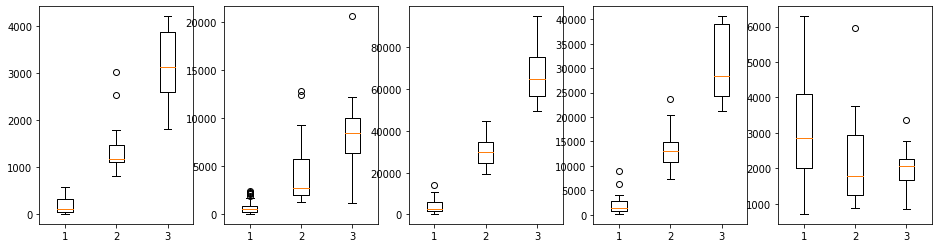

In [147]:

_, axes = plt.subplots(ncols=5, figsize = (16,4))
axes[0].boxplot([data[data['cluster'] == 0]['AddressCount'], data[data['cluster'] == 1]['AddressCount'], data[data['cluster'] == 2]['AddressCount']])
axes[1].boxplot([data[data['cluster'] == 0]['CallsCount'], data[data['cluster'] == 1]['CallsCount'], data[data['cluster'] == 2]['CallsCount']])
axes[2].boxplot([data[data['cluster'] == 0]['ClicksCount'], data[data['cluster'] == 1]['ClicksCount'], data[data['cluster'] == 2]['ClicksCount']])
axes[3].boxplot([data[data['cluster'] == 0]['UsersCount'], data[data['cluster'] == 1]['UsersCount'], data[data['cluster'] == 2]['UsersCount']])
axes[4].boxplot([data[data['cluster'] == 0]['Distance'], data[data['cluster'] == 1]['Distance'], data[data['cluster'] == 2]['Distance']])




([array([5., 7., 6., 7., 7., 5., 7., 1., 3., 2.]),
  array([5., 4., 1., 2., 3., 1., 0., 0., 0., 1.]),
  array([2., 1., 4., 1., 1., 0., 0., 0., 0., 0.])],
 array([ 714.7872362 , 1272.52924372, 1830.27125124, 2388.01325876,
        2945.75526628, 3503.49727379, 4061.23928131, 4618.98128883,
        5176.72329635, 5734.46530387, 6292.20731139]),
 <a list of 3 Lists of Patches objects>)

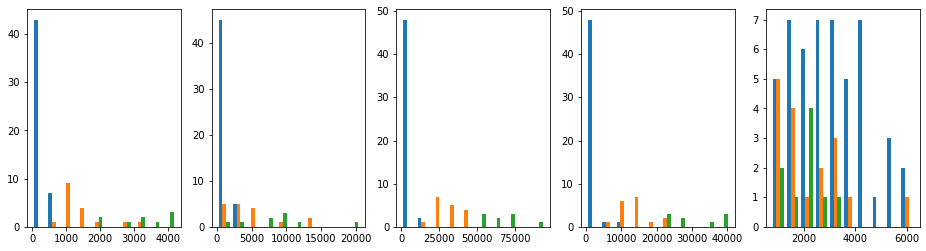

In [148]:
_, axes = plt.subplots(ncols=5, figsize = (16,4))
axes[0].hist([data[data['cluster'] == 0]['AddressCount'], data[data['cluster'] == 1]['AddressCount'], data[data['cluster'] == 2]['AddressCount']])
axes[1].hist([data[data['cluster'] == 0]['CallsCount'], data[data['cluster'] == 1]['CallsCount'], data[data['cluster'] == 2]['CallsCount']])
axes[2].hist([data[data['cluster'] == 0]['ClicksCount'], data[data['cluster'] == 1]['ClicksCount'], data[data['cluster'] == 2]['ClicksCount']])
axes[3].hist([data[data['cluster'] == 0]['UsersCount'], data[data['cluster'] == 1]['UsersCount'], data[data['cluster'] == 2]['UsersCount']])
axes[4].hist([data[data['cluster'] == 0]['Distance'], data[data['cluster'] == 1]['Distance'], data[data['cluster'] == 2]['Distance']])

Как мы видим из распределения, наибольший вклад в разбиение на кластеры вносят параметры AddressCount, ClicksCount, UsersCount. Предположим, что остальные переменные можно не учитывать при кластеризации, поскольку как видно на гистограмме и ящике с усами их распределения пересекаются. Вернемся к этому чуть позже (1)

Мы можем сказать исходя из графиков, что кластеры разбились на 3 категории в зависимости от популярности. Это наблюдается на всех гистограммах по признакам, отображающим к-во взаимодействий с фирмой. Ожидаемо кластеры разбиты так:
- Непопулярный - большинство
- Средний - среднее к-во объектов
- Топ - меньшинство

Проверим сначала наше предположение с помощью критерия Крускала-Уоллиса(поскольку данные ненормальны) о равенстве средних во всех кластерах:

In [168]:
from scipy.stats import kruskal

In [173]:
_, alpha0 = kruskal(data[data['cluster'] == 0]['AddressCount'], data[data['cluster'] == 1]['AddressCount'],  data[data['cluster'] == 2]['AddressCount'])
_, alpha1 = kruskal(data[data['cluster'] == 0]['CallsCount'], data[data['cluster'] == 1]['CallsCount'],  data[data['cluster'] == 2]['CallsCount'])
_, alpha2 = kruskal(data[data['cluster'] == 0]['ClicksCount'], data[data['cluster'] == 1]['ClicksCount'],  data[data['cluster'] == 2]['ClicksCount'])
_, alpha3 = kruskal(data[data['cluster'] == 0]['UsersCount'], data[data['cluster'] == 1]['UsersCount'],  data[data['cluster'] == 2]['UsersCount'])
_, alpha4 = kruskal(data[data['cluster'] == 0]['Distance'], data[data['cluster'] == 1]['Distance'],  data[data['cluster'] == 2]['Distance'])

In [174]:
alpha0, alpha1, alpha2, alpha3, alpha4,

(4.1161142239024165e-12,
 2.1767169281226076e-10,
 3.6207978062510867e-12,
 4.265180981876524e-12,
 0.0171171820182455)

Заметим, что по всем показателям p-value статистики < 0.05 и мы отвергаем гипотезы, что все групповые средние равны по нашим показателям.

Поскольку для 1, 3, 4 параметра разделение средних видно еще из гистограммы и boxplot'a, то проверим равенство средних во 2 и 5 случаях критерием Манна-Уитни(т.к распределения ненормальны):

In [175]:
from scipy.stats import mannwhitneyu

In [176]:
_, value0 = mannwhitneyu(data[data['cluster'] == 0]['CallsCount'], data[data['cluster'] == 1]['CallsCount'])
_, value1 = mannwhitneyu(data[data['cluster'] == 1]['CallsCount'], data[data['cluster'] == 2]['CallsCount'])
_, value2 = mannwhitneyu(data[data['cluster'] == 0]['CallsCount'], data[data['cluster'] == 2]['CallsCount'])
value0, value1, value2

(1.0854167429998915e-08, 0.029621331113086208, 2.771135224405998e-06)

In [177]:
_, value0 = mannwhitneyu(data[data['cluster'] == 0]['Distance'], data[data['cluster'] == 1]['Distance'])
_, value1 = mannwhitneyu(data[data['cluster'] == 1]['Distance'], data[data['cluster'] == 2]['Distance'])
_, value2 = mannwhitneyu(data[data['cluster'] == 0]['Distance'], data[data['cluster'] == 2]['Distance'])
value0, value1, value2

(0.010372142125074243, 0.5, 0.018920986351833695)

Как мы видим из p-value, данные средние всех 3 классов по CallsCount различны, а вот про Distance такое сказать нельзя. Таким образом, вернемся к (1) и скажем, что переменная Distance слабо влияет на кластеризацию и в нашем случае может быть исключена как параметр кластеризации.

### Сравним кластеры по доле траффика с карты и мобильного продукта

In [149]:
data_2 = pd.read_csv('Data_Projects.csv', ';', decimal=',')

In [150]:
data_2 = data_2[(data_2['CallsCount'] < 30000) & (data_2['AddressCount'] < 8000)]

In [155]:
print(data_2.shape, predictions.shape)

(76, 10) (76,)


In [156]:
data_2['Cluster'] = predictions

In [159]:
data_2.head()

,AddressCount,CallsCount,ClicksCount,FirmsCount,GeoPart,MobilePart,UsersCount,Distance,IsGeo,Cluster
0,156,20,1903,176,0.416104,0.535762,1125,749.966084,1,0
1,17,37,258,20,0.211679,0.430657,157,2289.032424,0,0
2,78,56,1956,185,0.349475,0.476594,1195,1423.376512,1,0
3,14,70,378,19,0.318718,0.463744,206,3396.566089,0,0
4,111,90,4089,90,0.556175,0.490573,2934,1576.514154,1,0


{'whiskers': [<matplotlib.lines.Line2D at 0x1e422f92808>,
 'caps': [<matplotlib.lines.Line2D at 0x1e422f92f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e422f0b9c8>,
 'medians': [<matplotlib.lines.Line2D at 0x1e422f98a08>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e422f982c8>,
 'means': []}

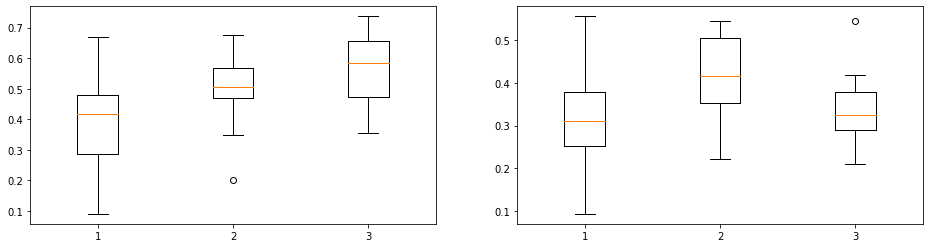

In [161]:
_, axes = plt.subplots(ncols=2, figsize=(16, 4))
axes[0].boxplot([data_2[data_2['Cluster'] == 0]['MobilePart'], data_2[data_2['Cluster'] == 1]['MobilePart'], data_2[data_2['Cluster'] == 2]['MobilePart']])
axes[1].boxplot([data_2[data_2['Cluster'] == 0]['GeoPart'], data_2[data_2['Cluster'] == 1]['GeoPart'], data_2[data_2['Cluster'] == 2]['GeoPart']])

Видим, что распределения наших групп несколько различаются. Проверим равенство групповых средних с помощью критерия Краскала-Уоллиса:

In [180]:
_, alpha0 = kruskal(data_2[data_2['Cluster'] == 0]['MobilePart'], data_2[data_2['Cluster'] == 1]['MobilePart'],  data_2[data_2['Cluster'] == 2]['MobilePart'])
_, alpha1 = kruskal(data_2[data_2['Cluster'] == 0]['GeoPart'], data_2[data_2['Cluster'] == 1]['GeoPart'],  data_2[data_2['Cluster'] == 2]['GeoPart'])
alpha0, alpha1

(0.0009905140255674642, 0.010798844825943385)

Данный уровень значимости отвергает гипотезу о равенстве средних во всех группах. Сравним погруппово с помощью критерия Манна-Уитни:

In [181]:
_, value0 = mannwhitneyu(data_2[data_2['Cluster'] == 0]['MobilePart'], data_2[data_2['Cluster'] == 1]['MobilePart'])
_, value1 = mannwhitneyu(data_2[data_2['Cluster'] == 1]['MobilePart'], data_2[data_2['Cluster'] == 2]['MobilePart'])
_, value2 = mannwhitneyu(data_2[data_2['Cluster'] == 0]['MobilePart'], data_2[data_2['Cluster'] == 2]['MobilePart'])
value0, value1, value2

(0.004650580237087045, 0.08055965816871613, 0.0012421563976341642)

Мы можем заметить, что нельзя отвергнуть гипотезу о равенстве средних в 2 и 3 кластерах. При этом попарное равенство средних в (1, 2), (1,3) кластерах отвергается

In [182]:
_, value0 = mannwhitneyu(data_2[data_2['Cluster'] == 0]['GeoPart'], data_2[data_2['Cluster'] == 1]['GeoPart'])
_, value1 = mannwhitneyu(data_2[data_2['Cluster'] == 1]['GeoPart'], data_2[data_2['Cluster'] == 2]['GeoPart'])
_, value2 = mannwhitneyu(data_2[data_2['Cluster'] == 0]['GeoPart'], data_2[data_2['Cluster'] == 2]['GeoPart'])
value0, value1, value2

(0.0013957169246832512, 0.07280504769843348, 0.25332009623466245)

Заметим, что для признака GeoPart мы уже не можем отвергнуть гипотезу о попарном равенстве средних в (2, 3) и (1, 3) кластерах. При этом гипотеза о равенстве средних в (1, 2) кластерах отвергается 

При этом для проверки равенства (2, 3) кластеров необходимо больше данных, поскольку boxplot'ы не похожи и возможно принятие гипотезы из-за малой наполненности кластеров(17 и 9 объектов соответственно)

#### Проверим гипотезу о том, что с мобильной версии заходят чаще, чем на сайт:

In [186]:
_, value1 = mannwhitneyu(data_2['GeoPart'], data_2['MobilePart'], alternative='less')
value1

2.8893583676575497e-06

Гипотеза о равенстве средних, при альтернативной о том, что в среднем MobilePart > GeoPart, отвергается. 

## Вывод:

Нами выделено 3 кластера(непопулярные места, объекты средней популярности и топовые заведения). Наполненность данных кластеров обратно пропорциональна популярности мест.

Данные кластеры отличны друг от друга по параметрам: AddressCount, CallsCount, ClicksCount, UsersCount (прямо пропорционально популярности мест). 
Нами не получено сильных статистических различий между кластерами по параметру Distance. 

Можно заметить, что показатели GeoPart и MobilePart различны для разных групп. С мобильной версии люди заходят преимущественно на популярные фирмы. С сайта отдается предпочтение местам средней популярности. 

Также стоит отметить, что мобильное приложение используется чаще, чем сайт. 